Generally following:<br>
https://medium.com/data-from-the-trenches/text-classification-the-first-step-toward-nlp-mastery-f5f95d525d73<br>
https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

In [2]:
import pprint
import re
import random
import glob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import text
from sklearn.linear_model import SGDClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
adventure_text_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Adventure\\*.txt')
adventure_csv_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Adventure\\*.csv')

gothic_text_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Gothic Fiction\\*.txt')
gothic_csv_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Gothic Fiction\\*.csv')

horror_text_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Horror\\*.txt')
horror_csv_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Horror\\*.csv')

humor_text_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Humor\\*.txt')
humor_csv_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Humor\\*.csv')

mystery_text_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Mystery Fiction\\*.txt')
mystery_csv_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Mystery Fiction\\*.csv')

scifi_text_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Science Fiction\\*.txt')
scifi_csv_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Science Fiction\\*.csv')

western_text_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Western\\*.txt')
western_csv_files = glob.glob('C:\\UT\\DataMining\\books\\books\\Western\\*.csv')

In [3]:
print('adventure: ',len(adventure_text_files), len(adventure_csv_files))
print('gothic: ',len(gothic_text_files), len(gothic_csv_files))
print('horror: ',len(horror_text_files), len(horror_csv_files))
print('humor: ',len(humor_text_files), len(humor_csv_files))
print('mystery: ',len(mystery_text_files), len(mystery_csv_files))
print('scifi: ',len(scifi_text_files), len(scifi_csv_files))
print('western: ',len(western_text_files), len(western_csv_files))

adventure:  64 63
gothic:  23 22
horror:  39 38
humor:  139 138
mystery:  12 11
scifi:  917 916
western:  79 78


In [4]:
endText = '_Meta_Data.csv'

for file in adventure_text_files:
    testText = file[:-4] + endText
    if testText not in adventure_csv_files:
        adventure_text_files.remove(file)
        
for file in gothic_text_files:
    testText = file[:-4] + endText
    if testText not in gothic_csv_files:
        gothic_text_files.remove(file)
                
for file in horror_text_files:
    testText = file[:-4] + endText
    if testText not in horror_csv_files:
        horror_text_files.remove(file)        

for file in humor_text_files:
    testText = file[:-4] + endText
    if testText not in humor_csv_files:
        humor_text_files.remove(file)

for file in mystery_text_files:
    testText = file[:-4] + endText
    if testText not in mystery_csv_files:
        mystery_text_files.remove(file)
        
for file in scifi_text_files:
    testText = file[:-4] + endText
    if testText not in scifi_csv_files:
        scifi_text_files.remove(file)
        
for file in western_text_files:
    testText = file[:-4] + endText
    if testText not in western_csv_files:
        western_text_files.remove(file)

In [5]:
random.seed(42)
max_files = 80
humor_text_files = random.sample(humor_text_files, max_files)
scifi_text_files = random.sample(scifi_text_files, max_files)

In [6]:
texts = []
cats = []

for file in adventure_text_files:
    fileCat = 'adventure'
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        texts.append(text)
        cats.append(fileCat)

for file in gothic_text_files:
    fileCat = 'gothic'
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        texts.append(text)
        cats.append(fileCat)

fileCat = 'horror'
for file in horror_text_files:
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        texts.append(text)
        cats.append(fileCat)

fileCat = 'humor'
for file in humor_text_files:
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        texts.append(text)
        cats.append(fileCat)

fileCat = 'mystery'
for file in mystery_text_files:
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        texts.append(text)
        cats.append(fileCat)

fileCat = 'scifi'
for file in scifi_text_files:
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        texts.append(text)
        cats.append(fileCat)

fileCat = 'western'
for file in western_text_files:
    with open(file, 'r', encoding='utf-8') as f:
        text = f.read()
        texts.append(text)
        cats.append(fileCat)


In [6]:
print(len(texts), len(cats))

372 372


In [7]:
all_data = pd.DataFrame(np.array(texts))
all_data['Category'] = cats
all_data.columns = ["text", "category"]

In [9]:
all_data.head()

,text,category
0,﻿The Project Gutenberg EBook of Affair in Arab...,adventure
1,ï»¿The Project Gutenberg EBook of Allan and th...,adventure
2,ï»¿The Project Gutenberg eBook of Allan Quater...,adventure
3,ï»¿The Project Gutenberg EBook of Allanâs Wi...,adventure
4,﻿The Project Gutenberg EBook of Around the Wor...,adventure


In [10]:
all_data.describe()

,text,category
count,372,372
unique,357,7
top,ï»¿The Project Gutenberg EBook of The Works of...,scifi
freq,3,80


In [8]:
train_data, test_data = train_test_split(all_data, test_size = 0.20, random_state=42)

In [9]:
train_data.shape, test_data.shape

((297, 2), (75, 2))

In [10]:
train_data.describe()

,text,category
count,297,297
unique,288,7
top,ï»¿The Project Gutenberg EBook of The Works of...,humor
freq,2,67


In [11]:
test_data.describe()

,text,category
count,75,75
unique,75,7
top,"ï»¿The Project Gutenberg eBook of Ayesha, by H...",adventure
freq,1,16


<AxesSubplot:>

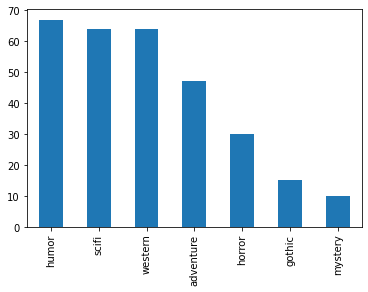

In [15]:
train_data['category'].value_counts().plot(kind='bar')

<AxesSubplot:>

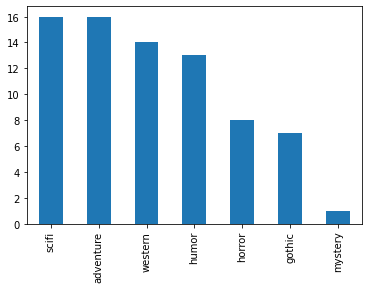

In [16]:
test_data['category'].value_counts().plot(kind='bar')

In [10]:
def line_is_marker(text):
    foundStars = '***' in text
    foundGutenberg = 'gutenberg' in text.lower()
    return (foundStars and foundGutenberg)

In [11]:
def remove_gutenberg_stuff(text):
    lines = text.splitlines()
    preamble_tag_found = False
    postscript_tag_found = False
    specialOverride = False # delete 10 lines after preamble
    c = 0
    for ndx, line in enumerate(lines):
        if (specialOverride):
            del lines[ndx]
            c += 1
            if (c == 10):
                specialOverride = False
        elif (line_is_marker(line)):
            del lines[ndx] # never need to retain a marker line
            if (not preamble_tag_found):
                preamble_tag_found = True
                specialOverride = True
            elif (not postscript_tag_found):
                postscript_tag_found = True
        elif (not preamble_tag_found):
            # haven't gotten through the preamble yet
            del lines[ndx]
        elif (postscript_tag_found):
            # we're in the postscript
            del lines[ndx]
    if (preamble_tag_found):
        # Only over-write text if we found the preamble line
        text = '\n'.join(lines)
    return text

In [12]:
def clean_text(text):
    """
    Applies some pre-processing on the given text.

    Steps :
    - Remove preamble and postscript
    - Remove url text
    - Remove numbers
    - Removing punctuation
    - Lowering text
    - Remove non-ascii
    """
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)
    
    # remove preamble and postscript
    text = remove_gutenberg_stuff(text)
    text = re.sub(r"(distributed proofreading)", "", text)
    text = re.sub(r"(proofreading team)", "", text)
    text = re.sub(r"(proofreading)", "", text)
    text = re.sub(r"(proofread)", "", text)
    text = re.sub(r"(etext)", "", text)
    text = re.sub(r"(team pgdpnet)", "", text)
    text = re.sub(r"(pgdpnet)", "", text)
    text = re.sub(r"(transcribers note)", "", text)
    text = re.sub(r"(transcribers)", "", text)
    text = re.sub(r"(transcribe)", "", text)
    
    # remove the characters [\], ['] and ["]
    text = re.sub(r"\\", "", text)    
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    
    # remove numbers including unsigned / signed integers and floats
    text = re.sub(r"[0-9]+", "", text)
    text = re.sub(r"[-0-9]+", "", text)
    text = re.sub(r"[+.0-9]+", "", text)
    
    # convert text to lowercase
    text = text.strip().lower()
    
    # replace punctuation characters with spaces
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    
    # remove url text
    text = re.sub(r"(http)*", "", text)
    text = re.sub(r"(www)*", "", text)
    
    # remove non-ascii characters
    text = re.sub(r'[^\x00-\x7F]+','', text)

    return text

***

### First attempt:
Using CountVectorizer and LinearSVC

In [22]:
# Transform each text into a vector of word counts
# CountVectorizer calls preprocessor, filters stopwords, and tokenizes to sparse matrix
# "Count" is a crude metric since longer books will naturally have more words
vectorizer = CountVectorizer(stop_words="english",
                             preprocessor=clean_text,
                             strip_accents="ascii",
                             max_df = 0.9, min_df = 0.2)

In [23]:
train_features = vectorizer.fit_transform(train_data["text"])    
test_features = vectorizer.transform(test_data["text"])

In [24]:
# Training
model = LinearSVC()
model.fit(train_features, train_data["category"])
y_pred_0 = model.predict(test_features)

C:\Users\clayj\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [25]:
# Evaluation
acc = accuracy_score(test_data["category"], y_pred_0)
print("Accuracy: {:.2f}".format(acc*100))

Accuracy: 76.00


In [26]:
#dictionary of feature indices, it's length is the number of features (words) in the data set
print(len(vectorizer.get_feature_names()))

6447


***

### Second attempt:
Using TF_IDF with 2-word ngram and LinearSVC

In [27]:
# Transform each text into a vector of word counts
# TF (Term Frequency) times IDF (Inverse Document Frequency) is better than a count vectorizer
# TF measures words by frequency to normalize for book length
# IDF reduces the weight of words that appear in many documents
vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=clean_text,
                             ngram_range=(1, 2))

train_features = vectorizer.fit_transform(train_data["text"])
test_features = vectorizer.transform(test_data["text"])

# Training
model = LinearSVC()
model.fit(train_features, train_data["category"])
y_pred_1 = model.predict(test_features)

# Evaluation
acc = accuracy_score(test_data["category"], y_pred_1)

print("Accuracy with ngram: {:.2f}".format(acc*100))

Accuracy with ngram: 73.33


In [16]:
def print_top10(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[i])[-10:]
        print("%s: %s" % (class_label,
              ", ".join(feature_names[j] for j in top10)))

In [17]:
def print_topn(vectorizer, clf, class_labels, n):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        topn = np.argsort(clf.coef_[i])[-n:]
        print("%s: %s" % (class_label,
              ", ".join(feature_names[j] for j in topn)))
        print()

In [30]:
print(train_features.shape)
print(type(train_features))

(297, 4229451)
<class 'scipy.sparse.csr.csr_matrix'>


In [31]:
little_text = """white fang"""
little_test = vectorizer.transform([little_text])
model.predict(little_test)

array(['adventure'], dtype=object)

### Repeat second attempt:
Using TF_IDF with 2-word ngram and LinearSVC this time with min_df to eliminate very rare words<br>
(specifically character names) and max_df for very common words

In [32]:
# Transform each text into a vector of word counts
# TF (Term Frequency) times IDF (Inverse Document Frequency) is better than a count vectorizer
# TF measures words by frequency to normalize for book length
# IDF reduces the weight of words that appear in many documents
vectorizer = TfidfVectorizer(stop_words="english",
                             preprocessor=clean_text,
                             ngram_range=(1, 2),
                             min_df=0.2,
                             max_df=0.9)

train_features = vectorizer.fit_transform(train_data["text"])
test_features = vectorizer.transform(test_data["text"])

# Training
model = LinearSVC()
model.fit(train_features, train_data["category"])
y_pred_1 = model.predict(test_features)

# Evaluation
acc = accuracy_score(test_data["category"], y_pred_1)

print("Accuracy with ngram: {:.2f}".format(acc*100))

Accuracy with ngram: 77.33


In [33]:
print(train_features.shape)
print(type(train_features))

(297, 8374)
<class 'scipy.sparse.csr.csr_matrix'>


In [34]:
little_text = """white fang"""
little_test = vectorizer.transform([little_text])
model.predict(little_test)

array(['adventure'], dtype=object)

***

### Second attempt - part 3
Grid search for hyperparameters

In [ ]:
# for mindf in [0, 0.1, 0.2]:
#     for maxdf in [.3]:
#         vectorizer = TfidfVectorizer(stop_words="english",
#                              preprocessor=clean_text,
#                              ngram_range=(1, 2),
#                              min_df=mindf,
#                              max_df=maxdf)

#         train_features = vectorizer.fit_transform(train_data["text"])
#         test_features = vectorizer.transform(test_data["text"])

#         # Training
#         model = LinearSVC()
#         model.fit(train_features, train_data["category"])
#         yhat_train = model.predict(train_features)
#         yhat_test = model.predict(test_features)

#         # Evaluation
#         acc_train = accuracy_score(train_data["category"], yhat_train)
#         acc_test = accuracy_score(test_data["category"], yhat_test)

#         print(mindf, maxdf, acc_train, acc_test)

Very good values for hyperparameters:<br>
ngram_range=(1,2)<br>
min_df=0.2<br>
max_df=0.3<br>

In [ ]:
train_features.shape

***

### Best SVC
Best hyperparameters, improved stop words

In [13]:
vectorizer = TfidfVectorizer(stop_words="english",
                     preprocessor=clean_text,
                     ngram_range=(1, 2),
                     min_df=0.2,
                     max_df=0.3)

train_features = vectorizer.fit_transform(train_data["text"])
test_features = vectorizer.transform(test_data["text"])

# Training
model = LinearSVC()
model.fit(train_features, train_data["category"])
yhat_train = model.predict(train_features)
yhat_test = model.predict(test_features)

# Evaluation
acc_train = accuracy_score(train_data["category"], yhat_train)
acc_test = accuracy_score(test_data["category"], yhat_test)

print("Train accuracy: ", acc_train)
print("Train accuracy: ", acc_test)

Train accuracy:  0.9663299663299664
Train accuracy:  0.8133333333333334


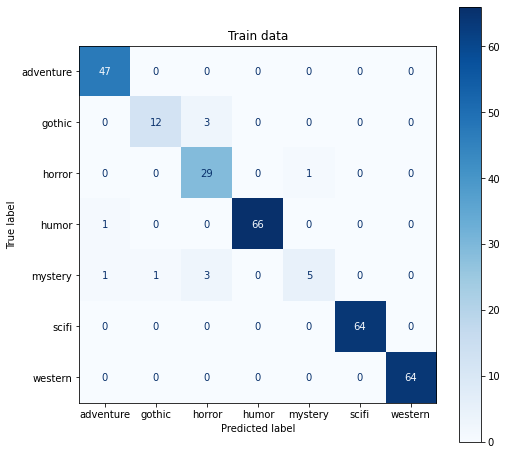

In [14]:
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(model, train_features, train_data["category"],
                          cmap = plt.cm.Blues,
                          normalize=None, ax=ax)
plt.title("Train data")
plt.show()

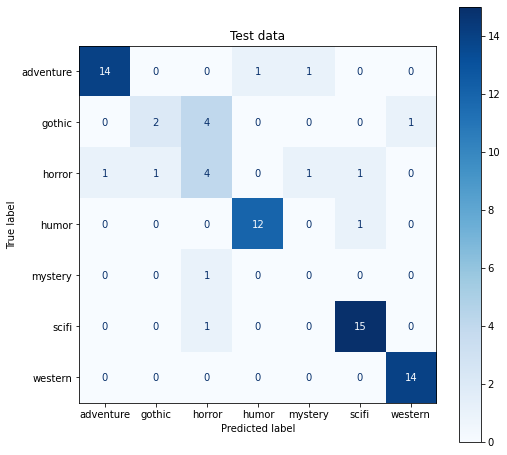

In [37]:
fig, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(model, test_features, test_data["category"],
                          cmap = plt.cm.Blues,
                          normalize=None, ax=ax)
plt.title("Test data")
plt.show()

In [38]:
little_text = """shoot the dang ol rabbit before the colonel drinks some whisky
                 and brings his revolver back from the creek"""
little_test = vectorizer.transform([little_text])
model.predict(little_test)

array(['western'], dtype=object)

In [39]:
train_features.shape, test_features.shape

((297, 3015), (75, 3015))

In [40]:
vectorizer.get_feature_names()

['abide copies',
 'able make',
 'aboard',
 'abode',
 'abreast',
 'abuse',
 'abyss',
 'accent',
 'accents',
 'acceptance',
 'accidental',
 'accidentally',
 'accidents',
 'accompanying',
 'accounted',
 'accuracy',
 'accurately',
 'accursed',
 'accuse',
 'ache',
 'ached',
 'achieved',
 'acknowledged',
 'acquaintances',
 'acres',
 'acute',
 'ad',
 'adjoining',
 'admirable',
 'admirably',
 'admission',
 'admitting',
 'adopt',
 'adorned',
 'afar',
 'affectionate',
 'affections',
 'afflicted',
 'afforded',
 'afoot',
 'africa',
 'aged',
 'agents',
 'aghast',
 'agin',
 'agree trademark',
 'agreement works',
 'ah said',
 'aided',
 'aint got',
 'alarming',
 'alien',
 'alight',
 'allusion',
 'almighty',
 'aloft',
 'aloof',
 'altar',
 'alternately',
 'amateur',
 'ambitious',
 'amidst',
 'ammunition',
 'amounted',
 'amuse',
 'ancestors',
 'anchor',
 'angels',
 'angles',
 'animated',
 'ankle',
 'ankles',
 'announce',
 'announcement',
 'announcing',
 'annoyance',
 'annoying',
 'anothers',
 'answer que

In [41]:
class_labels = model.classes_
print_topn(vectorizer, model, class_labels, 30)

adventure: whilst, david, majesty, lions, identical, snarled, ashore, diamonds, boats, colonel, axe, ay, regiment, corresponding, slaves, englishman, prisoners, duke, africa, december, folk, white man, priests, india, rome, elephant, hut, nay, dear old, la

gothic: passions, fancies, saint, readers, consolation, guilt, sensations, favourite, old lady, youthful, said mrs, terrace, gallery, hearth, mankind, thank god, greek, affections, nay, housekeeper, wifes, pleasures, lawyer, physician, van, princess, cabinet, cottage, heights, madam

horror: cord, abode, neighbours, recognised, council, episode, brick, gardens, coffin, lamps, lesser, luminous, theories, student, cellar, personality, inn, cupboard, candles, neighbourhood, fireplace, ghosts, grove, lawyer, occurrence, italian, tent, whilst, unto, tomb

humor: major, farmer, fiend, er, president, lookin, egg, cents, shoe, fox, vote, william, jove, visit gutenbergorg, hull, governor, wan, yer, said mrs, apple, porter, christmas, beastly

In [21]:
class_labels = model.classes_
print_topn(vectorizer, model, class_labels, 5)

adventure: elephant, hut, nay, dear old, la

gothic: princess, cabinet, cottage, heights, madam

horror: italian, tent, whilst, unto, tomb

humor: agin, bein, fairy, poet, ass

mystery: guardian, nephew, peter, birthday, van

scifi: automatic, formats distributed, transcribers, transcribers note, planet

western: harry, outfit, dad, indians, riders



In [53]:
# ourStopWords = ['distributed',
#                 'proofreading',
#                 'proofread',
#                 'etext',
#                 'pgdpnet',
#                 'transcribers',
#                 'transcribe',
#                 'gutenberg',
#                 'chapter',
#                 'gutenbergorg',
#                 'online'
#                ]

In [54]:
# stop_words = text.ENGLISH_STOP_WORDS.union(ourStopWords)

In [43]:
#vectorizer.get_stop_words()

***

Also tried MultinomialNB and SGDClassifier but not as good as LinearSVC 

***

### KMeans clustering
See if there is inherent structure in the 372 examples as they exist in 3015-dimentional feature space.

In [18]:
all_features = vectorizer.transform(all_data["text"])
all_features.shape

(372, 3015)

In [19]:
feature_names = vectorizer.get_feature_names()
len(feature_names)

3015

In [46]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(all_features)
kmeans.score(all_features)

-331.38998016822626

In [47]:
n = np.concatenate((np.arange(1, 10, 1),
                    np.arange(10, 350, 25)))
n

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  35,  60,  85,
       110, 135, 160, 185, 210, 235, 260, 285, 310, 335])

In [48]:
scores = []
for nc in n:
    kmeans=KMeans(n_clusters=nc, random_state=42)
    kmeans.fit(all_features)
    thisscore = kmeans.score(all_features)
    scores.append(-thisscore)

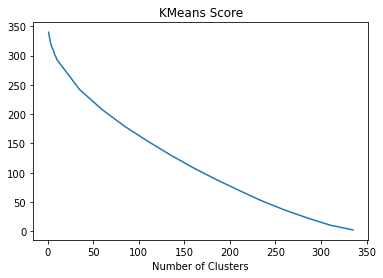

In [49]:
plt.plot(n, scores)
plt.title("KMeans Score")
plt.xlabel("Number of Clusters")
plt.show()

Not really clear what to learn from that<br>
Was hoping to see an inflection where score suddently stepped down.

***

### Silhouette Coefficient
Silhouette Coefficient measures distance between clusters, i.e. "cluster cohesion"

In [50]:
n = np.concatenate((np.arange(2, 10, 1),
                    np.arange(10, 350, 25)))
n

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  35,  60,  85, 110,
       135, 160, 185, 210, 235, 260, 285, 310, 335])

In [51]:
sil_scores = []
for nc in n:
    kmeans=KMeans(n_clusters=nc, random_state=42)
    kmeans.fit(all_features)
    thisscore = silhouette_score(all_features, kmeans.labels_)
    sil_scores.append(thisscore)

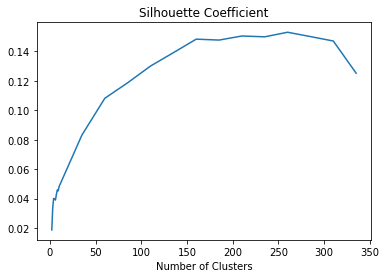

In [52]:
plt.plot(n, sil_scores)
plt.title("Silhouette Coefficient")
plt.xlabel("Number of Clusters")
plt.show()

Range of Silhouette Coefficient is (-1, 1) with higher numbers meaning better clusters.<br>
Based on cluster cohesion, the amount of clustering is relatively small.

***

### Fixed cluster size
We have 7 genres, compute 7 clusters based on feature space and assess whether or not<br>
the clusters predict genre, i.e. do like genres naturally cluster together?

In [20]:
def biggest_cluster_for_genre(cluster_lists, genre):
    col_norm_cluster_lists = cluster_lists.copy()
    for i in range(len(col_norm_cluster_lists[0])):
        col_sum = col_norm_cluster_lists[:, i].sum()
        if col_sum != 0:
            col_norm_cluster_lists[:, i] = col_norm_cluster_lists[:, i] / col_sum
        else:
            pass
    col_ndx = np.argwhere(catlab == genre)
    max_index_row = np.argmax(col_norm_cluster_lists[:,col_ndx])
    return max_index_row

In [21]:
def biggest_genre_for_cluster(cluster_lists, cluster):
    row_norm_cluster_lists = cluster_lists / cluster_lists.sum(axis=1, keepdims=1)
    max_genre_ndx = np.argmax(row_norm_cluster_lists[cluster])
    return catlab[max_genre_ndx]

In [22]:
def conv_score(cluster_lists, cluster):
    '''returns scalar score that is the dot product
    i.e. "convolution" of makeup and distribution
    A high score means most of the cluster is in
    genres where it is the primary cluster for that genre(s)'''
    m = makeup(cluster_lists, cluster)
    d = distr(cluster_lists, cluster)
    return np.dot(m, d)

In [23]:
def makeup(cluster_lists, cluster):
    '''returns array of dimension [genres].
    array contains the fraction of each genre made up by
    books in the designated cluster.
    In other words, the designated cluster makes up what
    fraction of each genre'''
    
    col_norm_cluster_lists = cluster_lists.copy()
    for i in range(len(col_norm_cluster_lists[0])):
        col_sum = col_norm_cluster_lists[:, i].sum()
        if col_sum != 0:
            col_norm_cluster_lists[:, i] = col_norm_cluster_lists[:, i] / col_sum
        else:
            pass
    return col_norm_cluster_lists[cluster]

In [24]:
def distr(cluster_lists, cluster):
    '''returns array of dimension [genres].
    array contains the fraction of the designated cluster
    that is in each genre.
    In other words, how much of the designated cluster is
    in each genre'''
    
    row_norm_cluster_lists = cluster_lists / cluster_lists.sum(axis=1, keepdims=1)
    return row_norm_cluster_lists[cluster]

In [25]:
def conv_scores(cluster_lists):    
    cs = []
    for c in range(len(cluster_lists)):
#    for c in range(len(cluster_lists[0])):
        cs.append(conv_score(cluster_lists, c))
    return cs

In [26]:
def countStrong(cs):
    cutoff = 0.3
    count = 0
    for c in cs:
        if (c >= cutoff):
            count += 1
    return count

In [27]:
def StrongClusterCount(n_clusters):
    ''' Runs KMeans with specified number of clusters
    Compares clusters to book genres using the Conv Score metric
    Returns the number of clusters that are "strong" relative to genres'''
    
    # Find clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(all_features)
    clusters = kmeans.predict(all_features)
    
    # Count books of each cluster that appear in each genre
    cl = np.zeros((n_clusters, len(catlab)))
    
    for r in range(len(clusters)):
        for s in range(n_clusters):
            if (clusters[r] == s):
                cl[s, np.argwhere(catlab == all_data["category"][r])] += 1
    
    return countStrong(conv_scores(cl))

In [28]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(all_features)
clusters = kmeans.predict(all_features)

In [ ]:
# plt.hist(clusters)
# plt.show()

In [ ]:
# plt.hist(all_data["category"])
# plt.show()

In [29]:
catlab = np.unique(all_data["category"])
cluster_0 = np.zeros_like(catlab)
cluster_1 = np.zeros_like(catlab)
cluster_2 = np.zeros_like(catlab)
cluster_3 = np.zeros_like(catlab)
cluster_4 = np.zeros_like(catlab)
cluster_5 = np.zeros_like(catlab)
cluster_6 = np.zeros_like(catlab)

for r in range(len(clusters)):
    if (clusters[r] == 0):
        cluster_0[np.argwhere(catlab == all_data["category"][r])] += 1
    elif (clusters[r] == 1):
        cluster_1[np.argwhere(catlab == all_data["category"][r])] += 1
    elif (clusters[r] == 2):
        cluster_2[np.argwhere(catlab == all_data["category"][r])] += 1
    elif (clusters[r] == 3):
        cluster_3[np.argwhere(catlab == all_data["category"][r])] += 1
    elif (clusters[r] == 4):
        cluster_4[np.argwhere(catlab == all_data["category"][r])] += 1
    elif (clusters[r] == 5):
        cluster_5[np.argwhere(catlab == all_data["category"][r])] += 1
    elif (clusters[r] == 6):
        cluster_6[np.argwhere(catlab == all_data["category"][r])] += 1

In [30]:
cluster_lists = np.array([cluster_0, cluster_1, cluster_2, cluster_3, 
                          cluster_4, cluster_5, cluster_6])

In [ ]:
# labels, counts = np.unique(cluster_humor, return_counts=True)
# plt.bar(labels, counts, align='center')
# plt.title("Clusters for Humor")
# #plt.xlim(0,6)
# plt.show()

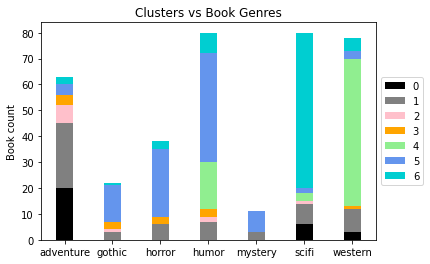

In [72]:
ind = np.arange(7)
width = 0.35
fig, ax = plt.subplots()

p1 = ax.bar(ind, cluster_0, width, label='0', color=['black'])
p2 = ax.bar(ind, cluster_1, width, label='1', color=['gray'], bottom=cluster_0)
p3 = ax.bar(ind, cluster_2, width, label='2', color=['pink'], bottom=cluster_0+cluster_1)
p4 = ax.bar(ind, cluster_3, width, label='3', color=['orange'], bottom=cluster_0+cluster_1+cluster_2)
p5 = ax.bar(ind, cluster_4, width, label='4', color=['lightgreen'], bottom=cluster_0+cluster_1+cluster_2+cluster_3)
p6 = ax.bar(ind, cluster_5, width, label='5', color=['cornflowerblue'], bottom=cluster_0+cluster_1+cluster_2+cluster_3+cluster_4)
p7 = ax.bar(ind, cluster_6, width, label='6', color=['darkturquoise'], bottom=cluster_0+cluster_1+cluster_2+cluster_3+cluster_4+cluster_5)

ax.set_ylabel('Book count')
ax.set_title('Clusters vs Book Genres')
ax.set_xticks(ind)
ax.set_xticklabels(catlab)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [31]:
cs7 = conv_scores(cluster_lists)
print(cs7)

[0.23843417119279187, 0.238462911597079, 0.08052112029384756, 0.07323012722448811, 0.5873890532544378, 0.5554151442508699, 0.5818208326760959]


Looking at that chart, it almost seems like we really have 4 categories:<br>
Cluster 0 and 1 == adventure<br>
Cluster 5 = gothic, horror, humor, and mystery<br>
Cluster 6 = scifi<br>
Cluster 4 = western<br>
(Clusters 2 and 3 don't include many books)

***

### Cluster analysis based on 4 clusters

In [86]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(all_features)
clusters = kmeans.predict(all_features)

In [74]:
catlab = np.unique(all_data["category"])
cluster_0 = np.zeros_like(catlab)
cluster_1 = np.zeros_like(catlab)
cluster_2 = np.zeros_like(catlab)
cluster_3 = np.zeros_like(catlab)

for r in range(len(clusters)):
    if (clusters[r] == 0):
        cluster_0[np.argwhere(catlab == all_data["category"][r])] += 1
    elif (clusters[r] == 1):
        cluster_1[np.argwhere(catlab == all_data["category"][r])] += 1
    elif (clusters[r] == 2):
        cluster_2[np.argwhere(catlab == all_data["category"][r])] += 1
    elif (clusters[r] == 3):
        cluster_3[np.argwhere(catlab == all_data["category"][r])] += 1

In [75]:
cluster_lists = np.array([cluster_0, cluster_1, cluster_2, cluster_3])

In [ ]:
# for i in catlab:
#     print(biggest_cluster_for_genre(cluster_lists, i))

In [ ]:
# for i in range(4):
#     print(biggest_genre_for_cluster(cluster_lists, i))

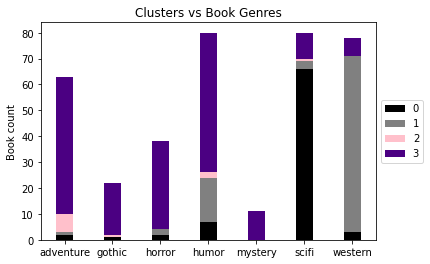

In [77]:
ind = np.arange(7)
width = 0.35
fig, ax = plt.subplots()

p1 = ax.bar(ind, cluster_0, width, label='0', color=['black'])
p2 = ax.bar(ind, cluster_1, width, label='1', color=['gray'], bottom=cluster_0)
p3 = ax.bar(ind, cluster_2, width, label='2', color=['pink'], bottom=cluster_0+cluster_1)
p4 = ax.bar(ind, cluster_3, width, label='3', color=['indigo'], bottom=cluster_0+cluster_1+cluster_2)

ax.set_ylabel('Book count')
ax.set_title('Clusters vs Book Genres')
ax.set_xticks(ind)
ax.set_xticklabels(catlab)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [76]:
cs4 = conv_scores(cluster_lists)
print(cs4)

[0.6838530170645181, 0.6937163456683411, 0.08052112029384756, 0.7540654895709197]


Now it looks like there is just three clusters:<br>
I: Adventure, Gothic, Horror, Humor, Mystery<br>
II: SciFi<br>
III: Western

***

In [135]:
numClusters = []
numStrongClusters = []

for i in range(2, 50):
    numClusters.append(i)
    numStrongClusters.append(StrongClusterCount(i))

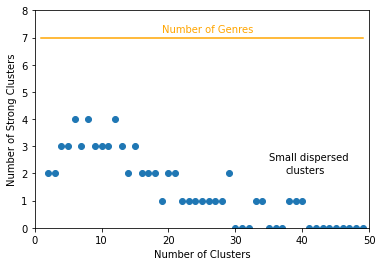

In [139]:
plt.scatter(numClusters, numStrongClusters)
plt.plot([1, 49], [len(catlab), len(catlab)], color='orange')
plt.xlim(0,50)
plt.ylim(0,8)
plt.text(19, 7.2,"Number of Genres", color='orange')
#plt.text(1, 1, "Not enough")
#plt.text(1.5, 0.5, "clusters")
plt.text(35, 2.5, "Small dispersed")
plt.text(37.5, 2, "clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Number of Strong Clusters")
plt.show()

***

### Conclusion of Cluster Analysis:
#### #1:
By inspection of KMeans score, there is not a natural obvious number of inherent clusters in the feature space of our TFIDF vector transform.
#### #2:
The book genres as assigned by Gutenberg.org are related to KMeans clusters based on TFIDF, but clusters do not neatly correspond to genres.  In other words there is not a strong 1:1 mapping of clusters to genres.<br>